In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import coint
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/TU/dex_WETHUSDT.pkl', 'rb') as f:
    dex = pickle.load(f)

with open('/content/drive/MyDrive/TU/ETHUSDT.pkl', 'rb') as f:
    cex = pickle.load(f)

merged = cex.merge(dex, left_index=True, right_index=True, suffixes=('_btc', '_uni'))

# **1. Calculating moving avarage**

In [ ]:
merged['moving_avg_uni'] = merged['close_uni'].rolling(window=5).mean()
merged['moving_avg_btc'] = merged['close_btc'].rolling(window=5).mean()

# Min-Max Normalization
merged['moving_avg_btc_normalized'] = (merged['moving_avg_btc'] - merged['moving_avg_btc'].min()) / (merged['moving_avg_btc'].max() - merged['moving_avg_btc'].min())
merged['moving_avg_uni_normalized'] = (merged['moving_avg_uni'] - merged['moving_avg_uni'].min()) / (merged['moving_avg_uni'].max() - merged['moving_avg_uni'].min())

#merged = merged.resample('H').mean()
start_time = '2022-01-01 00:00:00'
end_time = '2022-01-10 23:59:59'
merged = merged.loc[start_time:end_time]

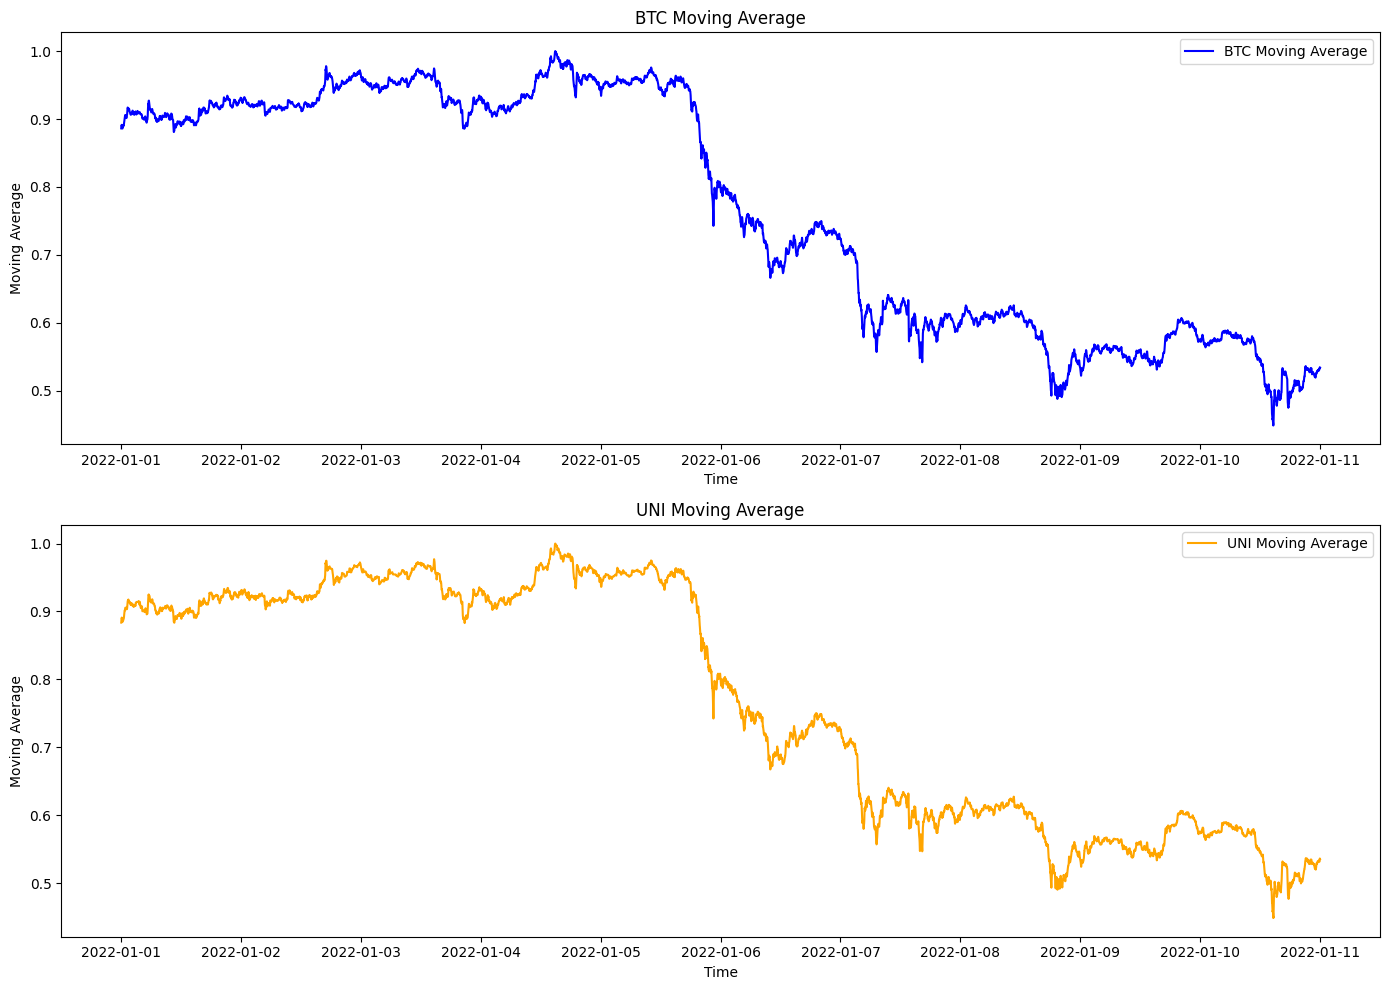

In [ ]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].plot(merged.loc[start_time:end_time].index, merged.loc[start_time:end_time]['moving_avg_btc_normalized'], label='BTC Moving Average', color='blue')
axs[1].plot(merged.loc[start_time:end_time].index, merged.loc[start_time:end_time]['moving_avg_uni_normalized'], label='UNI Moving Average', color='orange')
axs[0].set_title('BTC Moving Average')
axs[1].set_title('UNI Moving Average')
for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Moving Average')
    ax.legend()

plt.tight_layout()
plt.show()

The movement from January 15th to April 1st seem to deviate from each other strongly with a suspisious difference in trends, highs and lows

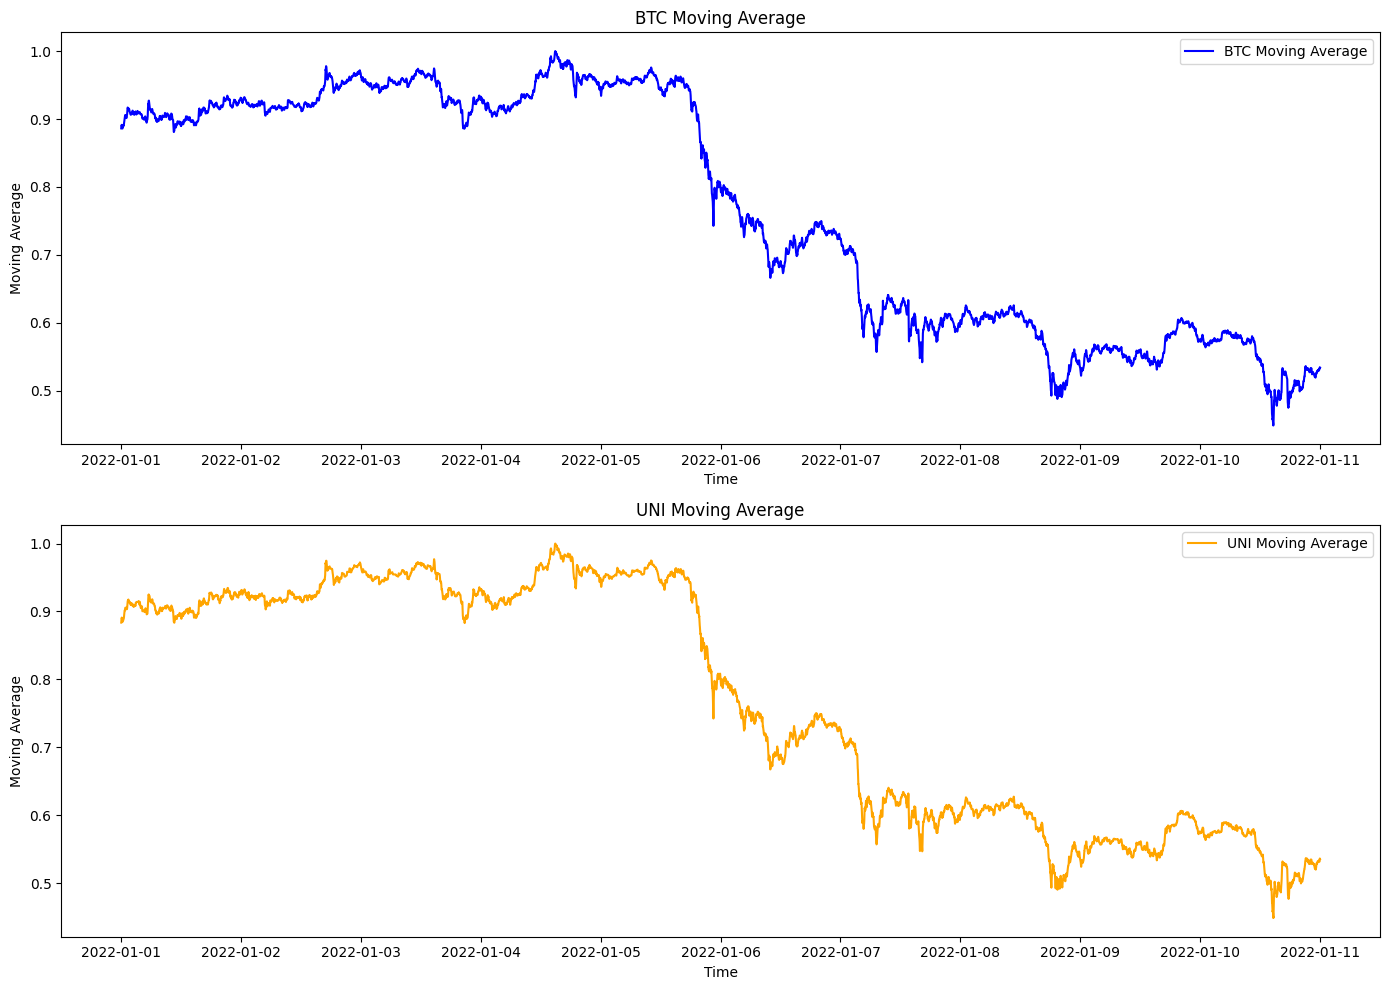

In [ ]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].plot(merged.loc[start_time:end_time].index, merged.loc[start_time:end_time]['moving_avg_btc_normalized'], label='BTC Moving Average', color='blue')
axs[1].plot(merged.loc[start_time:end_time].index, merged.loc[start_time:end_time]['moving_avg_uni_normalized'], label='UNI Moving Average', color='orange')
axs[0].set_title('BTC Moving Average')
axs[1].set_title('UNI Moving Average')
for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Moving Average')
    ax.legend()

plt.tight_layout()
plt.show()

# **2. Correlation coefficient of percentage change**

In [ ]:
merged['pct_change_btc'] = merged['moving_avg_btc'].pct_change()
merged['pct_change_uni'] = merged['moving_avg_uni'].pct_change()

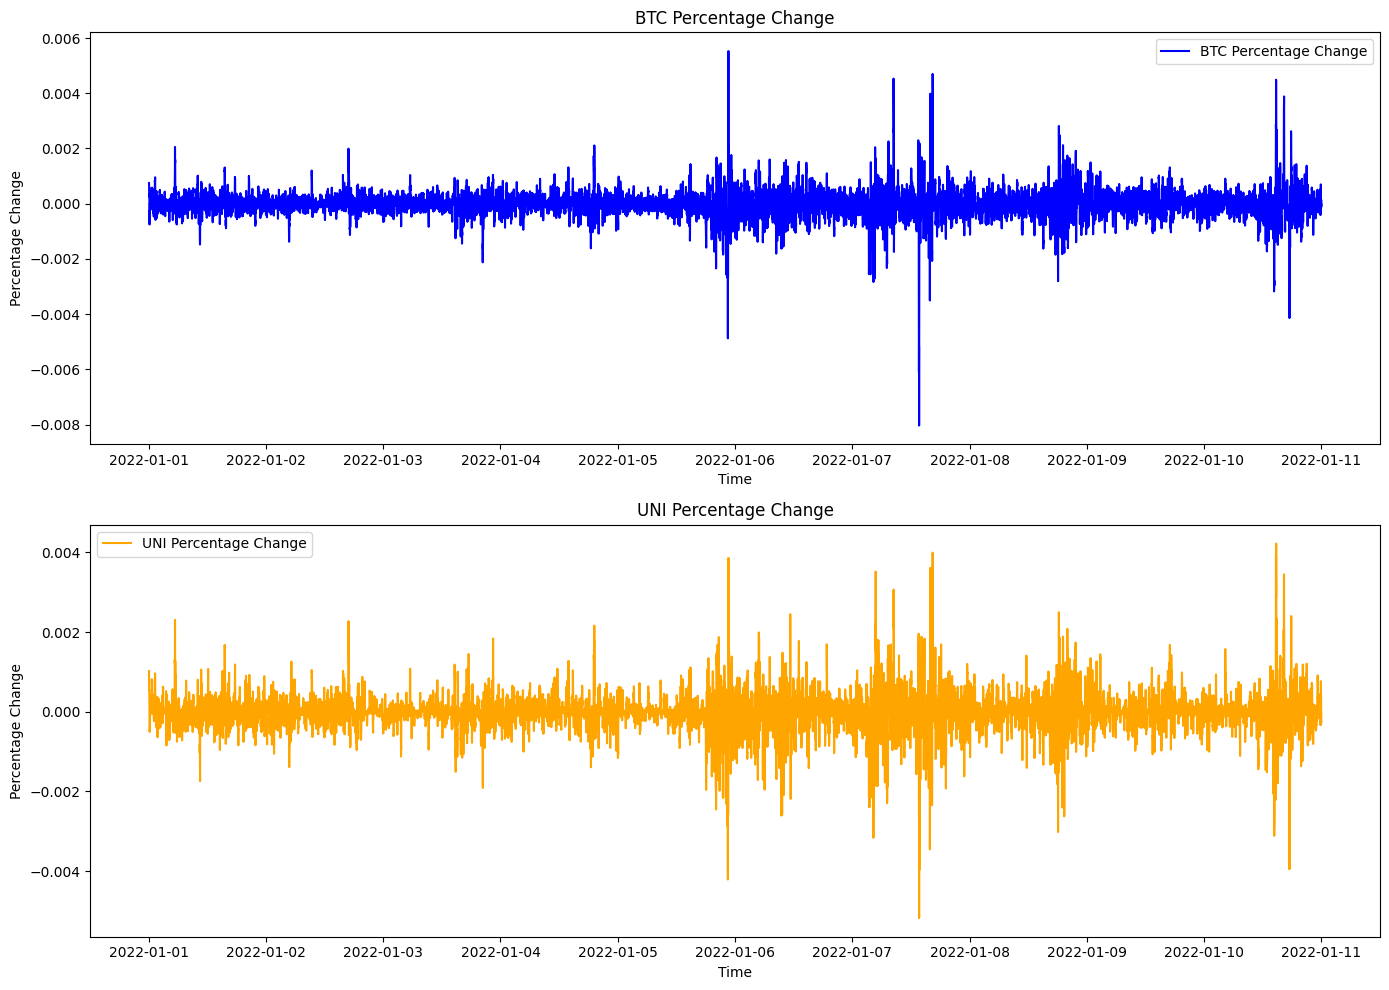

In [ ]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].plot(merged.loc[start_time:end_time].index, merged.loc[start_time:end_time]['pct_change_btc'], label='BTC Percentage Change', color='blue')
axs[1].plot(merged.loc[start_time:end_time].index, merged.loc[start_time:end_time]['pct_change_uni'], label='UNI Percentage Change', color='orange')
axs[0].set_title('BTC Percentage Change')
axs[1].set_title('UNI Percentage Change')
for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Percentage Change')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
def calculate_correlation(merged, start_date, end_date, interval):
    start_dates = pd.date_range(start=start_date, end=end_date, freq=interval)
    correlation_values = []

    for start_time in start_dates:
        if interval == 'M':
            end_time = start_time + pd.offsets.MonthEnd(1) - pd.Timedelta(days=1)
        elif interval == 'W':
            end_time = start_time + pd.DateOffset(weeks=1) - pd.Timedelta(days=1)
        
        correlation = merged.loc[start_time:end_time, 'moving_avg_btc_normalized'].dropna().corr(merged.loc[start_time:end_time, 'moving_avg_uni_normalized'].dropna())
        print(f'Correlation coefficient for period starting {start_time}:', correlation)
        
        correlation_values.append(correlation)

    return correlation_values

### Correlation coefficient full year

In [ ]:
correlation = merged['moving_avg_btc_normalized'].dropna().corr(merged['moving_avg_uni_normalized'].dropna())
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.9999425288432898


### Correlation coefficient each month

In [ ]:
M_coef = calculate_correlation(merged, start_time, end_time, 'M')
# Funktioniert nur mit Daten über meherere Monate

Correlation coefficient for period starting 2022-01-31 00:00:00: nan
Correlation coefficient for period starting 2022-02-28 00:00:00: nan
Correlation coefficient for period starting 2022-03-31 00:00:00: nan
Correlation coefficient for period starting 2022-04-30 00:00:00: nan
Correlation coefficient for period starting 2022-05-31 00:00:00: nan
Correlation coefficient for period starting 2022-06-30 00:00:00: nan
Correlation coefficient for period starting 2022-07-31 00:00:00: nan
Correlation coefficient for period starting 2022-08-31 00:00:00: nan
Correlation coefficient for period starting 2022-09-30 00:00:00: nan
Correlation coefficient for period starting 2022-10-31 00:00:00: nan
Correlation coefficient for period starting 2022-11-30 00:00:00: nan
Correlation coefficient for period starting 2022-12-31 00:00:00: nan


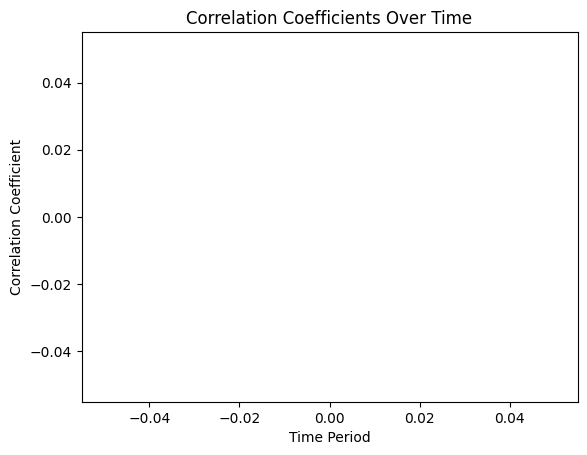

In [ ]:
plt.plot(M_coef)
plt.title('Correlation Coefficients Over Time')
plt.xlabel('Time Period')
plt.ylabel('Correlation Coefficient')
plt.show()

### Correlation coefficient each week

In [ ]:
W_coef = calculate_correlation(merged, start_time, end_time, 'W')
# Funktioniert nur mit Daten über meherere Wochen

Correlation coefficient for period starting 2022-01-02 00:00:00: 0.9999811557198711
Correlation coefficient for period starting 2022-01-09 00:00:00: 0.9999371844272685
Correlation coefficient for period starting 2022-01-16 00:00:00: 0.9999761595425195
Correlation coefficient for period starting 2022-01-23 00:00:00: 0.9999188612590614
Correlation coefficient for period starting 2022-01-30 00:00:00: 0.9999847944054553
Correlation coefficient for period starting 2022-02-06 00:00:00: 0.9999666331141337
Correlation coefficient for period starting 2022-02-13 00:00:00: 0.9999896454850098
Correlation coefficient for period starting 2022-02-20 00:00:00: 0.9999850815475358
Correlation coefficient for period starting 2022-02-27 00:00:00: 0.9999939730486652
Correlation coefficient for period starting 2022-03-06 00:00:00: 0.9999878097098102
Correlation coefficient for period starting 2022-03-13 00:00:00: 0.9999886694764695
Correlation coefficient for period starting 2022-03-20 00:00:00: 0.999990986

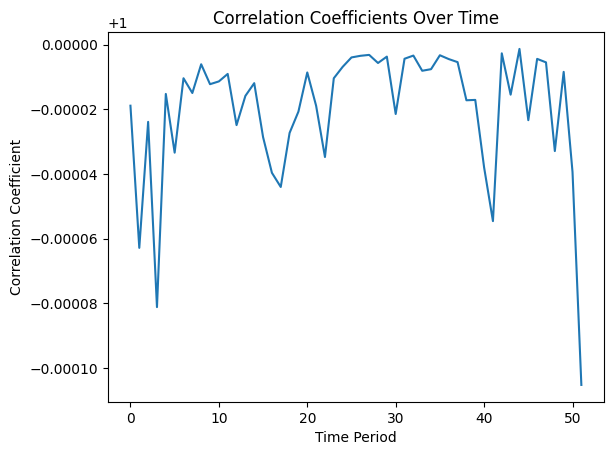

In [ ]:
plt.plot(W_coef)
plt.title('Correlation Coefficients Over Time')
plt.xlabel('Time Period')
plt.ylabel('Correlation Coefficient')
plt.show()

# **3. Cross-Correlation**

Cross-correlation is a measure of similarity of two time series as a function of the displacement of one relative to the other. This is also known as a sliding dot product or sliding inner-product. It is commonly used for searching a long-duration signal for a shorter, known feature. 

In [ ]:
start_date = '2022-01-01'
end_date = '2022-12-01'
focus_frame = merged.loc[start_date:end_date].copy()

In [ ]:
import numpy as np

ts1 = focus_frame['moving_avg_btc_normalized'].dropna()
ts2 = focus_frame['moving_avg_uni_normalized'].dropna()
assert len(ts1) == len(ts2)

lags = np.arange(-len(ts1) + 1, len(ts1))
ccov = np.correlate(ts1, ts2, mode='full')
ccor = ccov / len(ts1)

print('Cross-correlation:', ccor)

Cross-correlation: [1.50597810e-05 3.03247193e-05 4.53980916e-05 ... 4.52450553e-05
 3.02125705e-05 1.49932159e-05]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


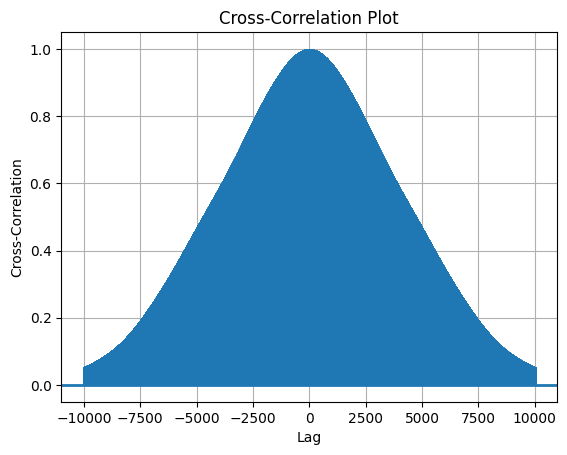

In [ ]:
plt.xcorr(ccor, ccor, usevlines=True, maxlags=10000, normed=True, lw=2)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Plot')
plt.grid(True)
plt.show()

The bell shape indicates a symmetric correlation pattern between the two time series. The bell shape typically suggests a strong positive correlation at the center lag, gradually decreasing towards the edges. It means that there is a time delay or lag between the two series, resulting in a lagged correlation pattern. This shape is expected when the two series have a consistent and periodic relationship, such as seasonal or cyclical patterns.

# **4. Cointegration Test**

The p-value from the cointegration test tells the probability that the two series are not cointegrated. A small p-value (typically ≤ 0.05) indicates strong evidence that the series are cointegrated.

In [ ]:
start_date = '2022-01-01'
end_date = '2022-12-01'
focus_frame = merged.loc[start_date:end_date].copy()

In [ ]:
score, p_value, _ = coint(focus_frame['moving_avg_btc_normalized'].dropna(), focus_frame['moving_avg_uni_normalized'].dropna())
print('Cointegration test p-value:', p_value)

Cointegration test p-value: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(


In [ ]:
start_date = '2022-01-01'
end_date = '2022-06-01'
focus_frame = merged.loc[start_date:end_date].copy()

In [ ]:
score, p_value, _ = coint(focus_frame['moving_avg_btc_normalized'].dropna(), focus_frame['moving_avg_uni_normalized'].dropna())
print('Cointegration test p-value:', p_value)

Cointegration test p-value: 6.41002618655754e-13
